In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime, date

isin=pd.read_csv("isin2005_2019.csv")

In [2]:
#Exploratory Data Analysis

# We have 28725 rows and 8 columns
isin.shape 

(28725, 8)

In [3]:
isin.head(3) 
# gvkey:The Global Company Key is a unique six-digit number key assigned to each company
# fyear:fiscal year
# at: assets
# isin:An International Securities Identification Number (ISIN) is a code that uniquely identifies a specific securities issue
# conm:company name
# fic: ISO country code -Incorporation
# sic: standard industry classification code 
#We have yearly data from 2005 to 2020 for 28725 companies

gvkey  fyear  datadate  ...                  conm  fic     sic
0   1166   2005  20051231  ...  ASM INTERNATIONAL NV  NLD  3559.0
1   1166   2006  20061231  ...  ASM INTERNATIONAL NV  NLD  3559.0
2   1166   2007  20071231  ...  ASM INTERNATIONAL NV  NLD  3559.0

[3 rows x 8 columns]

In [4]:
isin.info() # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28725 entries, 0 to 28724
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     28725 non-null  int64  
 1   fyear     28725 non-null  int64  
 2   datadate  28725 non-null  int64  
 3   at        28706 non-null  float64
 4   isin      28725 non-null  object 
 5   conm      28725 non-null  object 
 6   fic       28725 non-null  object 
 7   sic       28710 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.8+ MB


In [5]:
#Drop duplicates if any
isin.drop_duplicates(inplace=True) # We don't have duplicates

Text(0, 0.5, 'Count')

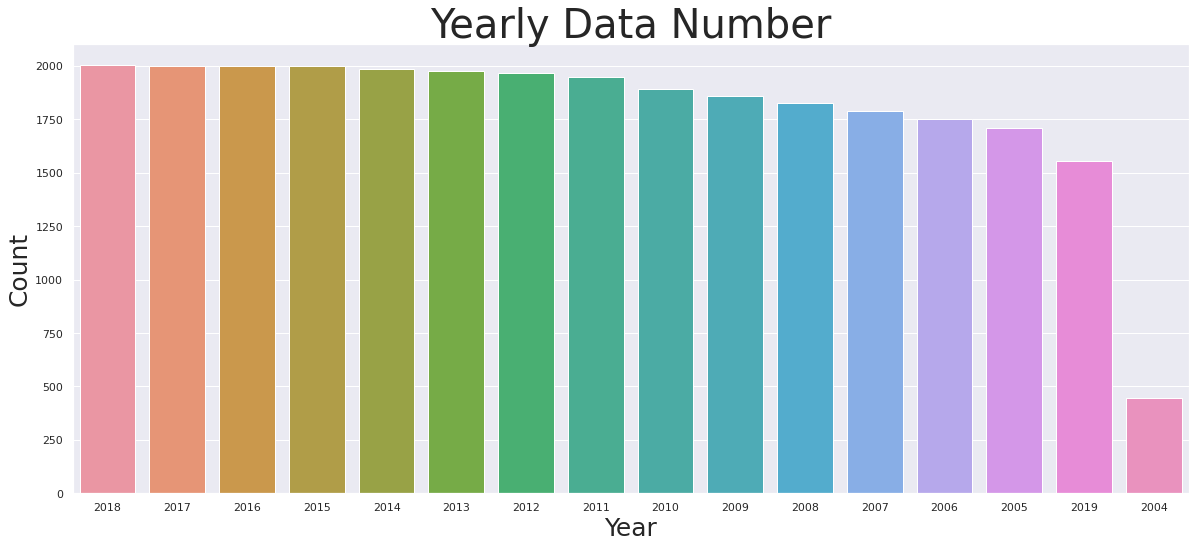

In [6]:
# After cleaning the data, we have a look at the basic information about the dataset
# Firstly, the following plot represents "Yearly Data Number"
sns.set(rc={'figure.figsize':(20,8.27)})
plot1=sns.countplot(x='fyear',data=isin,order=isin.fyear.value_counts().index)
plot1.set_title('Yearly Data Number',fontsize=40)
plot1.set_xlabel("Year",fontsize=25)
plot1.set_ylabel("Count",fontsize=25)

In [7]:
# Then, we want to have a look of yearly average assets.
# We build up a pivot table 
att=isin.groupby(by=["fyear"]).aggregate({"at":["mean","median"]})
att_1=att.pivot_table(index="fyear", values=['at'])

In [8]:
att

at             
               mean       median
fyear                           
2004   1.678455e+06  244707.0000
2005   1.402476e+06   12501.8760
2006   1.539922e+06   15024.0000
2007   1.698485e+06   17001.6000
2008   1.878725e+06   18298.6270
2009   1.944324e+06   18875.2120
2010   2.066062e+06   19918.6000
2011   2.102175e+06   20822.0000
2012   2.298421e+06   22061.3285
2013   2.679232e+06   23119.9060
2014   2.865269e+06   25326.1000
2015   3.049262e+06   26974.8700
2016   3.239574e+06   29258.5610
2017   3.439564e+06   30879.3870
2018   3.667396e+06   32304.7100
2019   4.088603e+06   21499.3880

<Figure size 720x576 with 0 Axes>

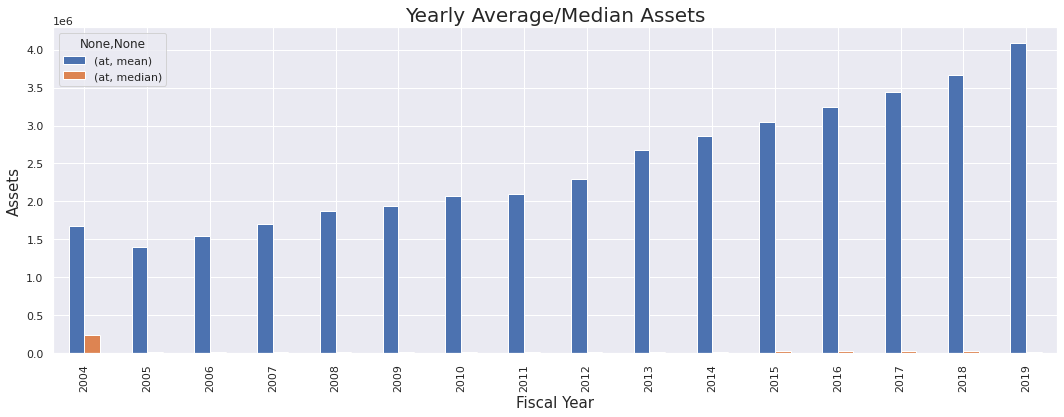

In [9]:
# Then we did plot of Yearly Average Assets to have a better understanding, and we find that most assets are small size
plt.figure(figsize=(10,8))
att_1.plot.bar(figsize=(18,6))
plt.title('Yearly Average/Median Assets',fontsize=20)
plt.xlabel('Fiscal Year',fontsize=15)
plt.ylabel('Assets',fontsize=15)
plt.show()

In [10]:
# After having a look of assets mean and median, we want to know more about it by getting distribution plot to check whether shows the similar siutaiton as the above plot
# We wide pivot table for yearly assets
at2=isin[['fyear','at']]
at_wide=at2.pivot(columns='fyear',values='at')
at_wide.head()

fyear  2004     2005     2006     2007     2008  ...  2015  2016  2017  2018  2019
0       NaN  812.308      NaN      NaN      NaN  ...   NaN   NaN   NaN   NaN   NaN
1       NaN      NaN  832.297      NaN      NaN  ...   NaN   NaN   NaN   NaN   NaN
2       NaN      NaN      NaN  840.333      NaN  ...   NaN   NaN   NaN   NaN   NaN
3       NaN      NaN      NaN      NaN  767.798  ...   NaN   NaN   NaN   NaN   NaN
4       NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   NaN   NaN   NaN

[5 rows x 16 columns]

In [11]:
# Before starting, we checked max assets column value to set a more suitable x range
isin['at'].max()

552419581.0

(0.0, 60000000.0)

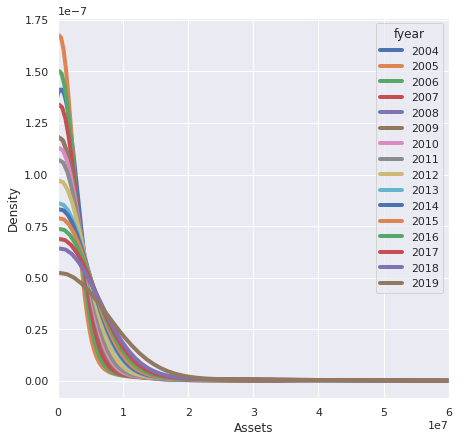

In [12]:
# We create a plot for Yearly Assets Distribution. There is not an apparent concentration, while most assets are smaller than 10000000
at_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("Assets")
plt.xlim(0,60000000)
# From the plot, there is not an apparent concentration, while most assets are smaller than 10000000

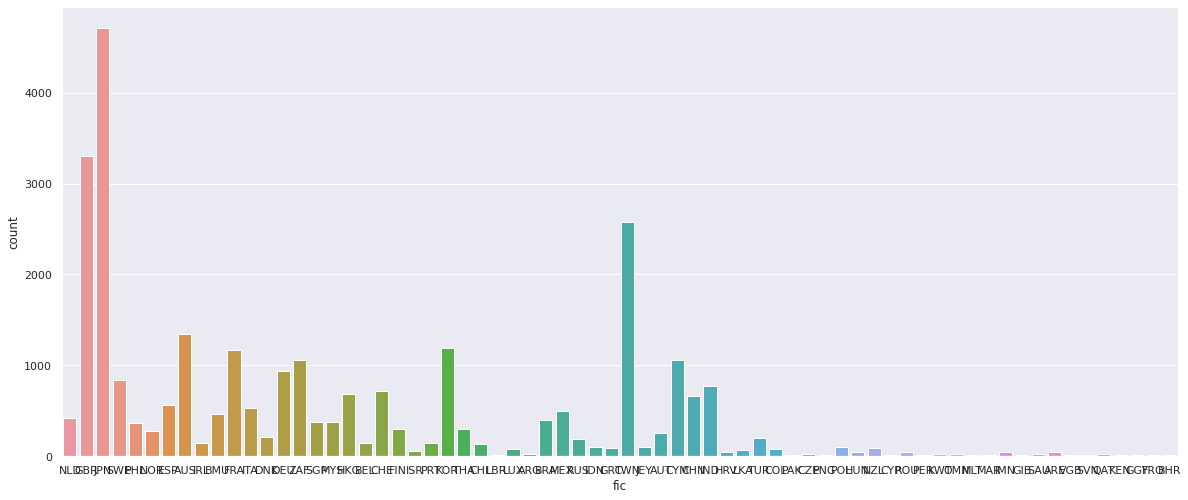

In [13]:
# The following plot shows countries distribution of the dataset
sns.countplot(data=isin,x='fic')

In [14]:
# After knowing the general situation, we also researched yearly country frequency 
isin[['fyear','fic']]
fic_year=isin.groupby(['fyear', 'fic']).size()
type(fic_year)
cross=fic_year.to_frame()
cross

0
fyear fic     
2004  AUS    3
      AUT    3
      BMU    5
      BRA    1
      CHE    2
...        ...
2019  THA   20
      TUR   14
      TWN  178
      VGB    1
      ZAF   57

[1031 rows x 1 columns]